# Avocado Data Analysis

## Data Description
In the Avocado dataset we have to predict the Average price using Regression model from the provided Data.

Import required libraries

In [248]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

## Loading the dataset

In [196]:
df=pd.read_csv('Avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


Data has been imported and we can see the first 5 rows of the data using df.head() function

In [197]:
df.shape

(16468, 14)

This is the shape of data

In [198]:
df.dtypes

Unnamed: 0      float64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

These are the datatypes of each columns which includes float and object values 

In [199]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

These are the columns of data

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 1.8+ MB


In [201]:
df.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

The data has null values

In [202]:
df.describe(include='all')

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,1517.000000,1517,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517,1517.000000,1517
unique,NaN,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,51
top,NaN,05-04-2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,California
freq,NaN,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1517,NaN,76
mean,26.995386,NaN,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,NaN,2015.162821,NaN
std,14.848287,NaN,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,NaN,0.369324,NaN
min,0.000000,NaN,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,NaN,2015.000000,NaN
25%,14.000000,NaN,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,NaN,2015.000000,NaN
50%,29.000000,NaN,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,NaN,2015.000000,NaN
75%,39.000000,NaN,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,NaN,2015.000000,NaN


In Total volume,Xlargebags mean is higher than median.

Standard deviation is very much higher in Unnamed column.

The max coulmn value is lesser than the 75th percentile in Total Volume,4770,Large Bags.

In XLarge bags there is a huge difference between 75th percentile and max column which means there are oultiers.

In [203]:
df.type.unique()

array(['conventional', nan], dtype=object)

In [204]:
df.year.unique()

array([2015., 2016.,   nan])

In [205]:
df.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids',
       'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield',
       'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas',
       'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth',
       'Nashville', 'NewYork', 'Northeast', 'NorthernNewEngland',
       'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains',
       'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico', nan], dtype=object)

In [206]:
df.dropna(inplace=True)

All the null values are dropped

In [207]:
LE=LabelEncoder()
df["type"]=LE.fit_transform(df["type"])

In [208]:
LE=LabelEncoder()
df["region"]=LE.fit_transform(df["region"])

In [209]:
LE=LabelEncoder()
df["year"]=LE.fit_transform(df["year"])

In [210]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1512,10.0,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,0,1,7
1513,11.0,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,0,1,7
1514,12.0,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,0,1,7
1515,13.0,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,0,1,7
1516,14.0,18-09-2016,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.00,0,1,7


In [213]:
x=df.drop("Date",axis=1)

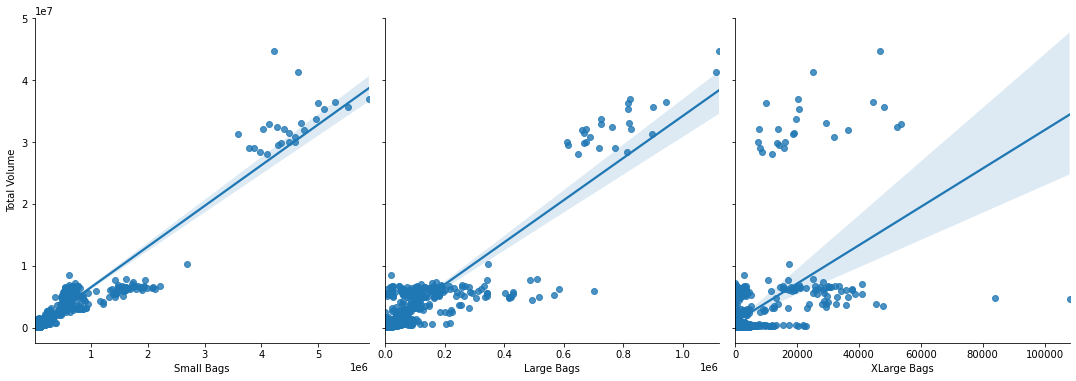

In [214]:
sns.pairplot(df, x_vars=['Small Bags', 'Large Bags', 'XLarge Bags'], y_vars='Total Volume', size=5, aspect=1, kind='reg')

In this plot we can see the graph of total volume vs small bags,large bags and Xlarge bags

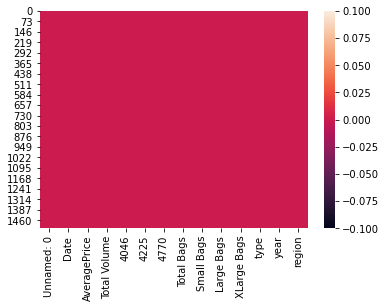

In [215]:
sns.heatmap(df.isnull())

There are no missing data or null values 

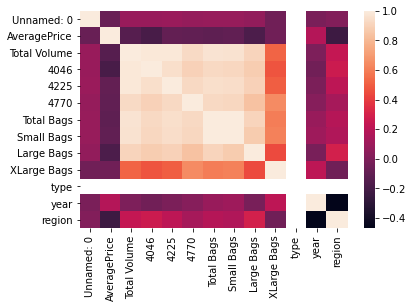

In [216]:
sns.heatmap(dfcor)

There are negative correaltion between year and region

Average price is highly correlated with type and year.

Small Bags and Large Bags are positively correlated with each other.

The black colour represent the negative correlation and the lighter shades represent the positive correlation as shown in the  number ranges present in side of the graph

In [218]:
df.shape

(1517, 14)

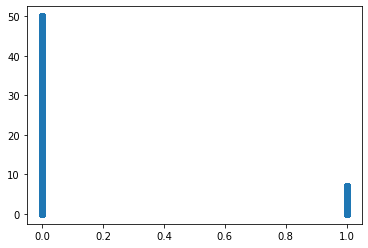

In [219]:
plt.scatter(df['year'],df['region'])

The scatter plot stating the relation of year and region

Unnamed: 0         AxesSubplot(0.125,0.536818;0.0945122x0.343182)
AveragePrice    AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Total Volume    AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
4046            AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
4225            AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
4770            AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Total Bags      AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Small Bags            AxesSubplot(0.125,0.125;0.0945122x0.343182)
Large Bags         AxesSubplot(0.238415,0.125;0.0945122x0.343182)
XLarge Bags        AxesSubplot(0.351829,0.125;0.0945122x0.343182)
type               AxesSubplot(0.465244,0.125;0.0945122x0.343182)
year               AxesSubplot(0.578659,0.125;0.0945122x0.343182)
region             AxesSubplot(0.692073,0.125;0.0945122x0.343182)
dtype: object

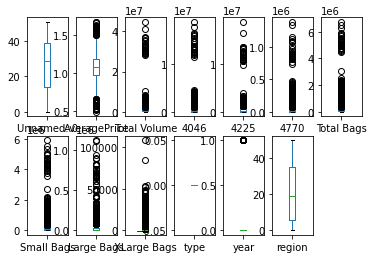

In [220]:
df.plot(kind='box',subplots=True, layout=(2,7))

There are few outliers

In [221]:
df.skew()

Unnamed: 0     -0.234824
AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
type            0.000000
year            1.828332
region          0.288146
dtype: float64

Skewness is present on Total Bags,Small Bags,Large bags,Xlarge bags,4225,4046, total volume

In [222]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)

In [223]:
df_new.skew()

Unnamed: 0     -0.348219
AveragePrice    0.021101
Total Volume    0.000000
4046           -0.012059
4225            0.008450
4770           -0.032945
Total Bags      0.005205
Small Bags      0.027632
Large Bags     -0.074795
XLarge Bags     0.417289
type            0.000000
year            1.828332
region         -0.209568
dtype: float64

Skewness is removed

In [224]:
scaler = StandardScaler().fit(df_new)
df_avocado_scaler = scaler.transform(df_new)
df_avocado = pd.DataFrame(df_avocado_scaler)
df_avocado.columns = ['Unnamed','AveragePrice', 'XLarge Bags', 'Small Bags', 'Large Bags','type','Total Volume', '4046','4225','4770','Total Bags','year','region']
df_avocado.head()

,Unnamed,AveragePrice,XLarge Bags,Small Bags,Large Bags,type,Total Volume,4046,4225,4770,Total Bags,year,region
0,-1.953012,1.367329,0.0,-1.757736,-0.545363,-1.675878,-2.030217,-1.847586,-1.072172,-0.885019,0.0,-0.441008,-1.828509
1,-1.855811,1.478422,0.0,-1.919557,-0.667814,-1.619934,-1.931468,-1.748426,-1.062461,-0.885019,0.0,-0.441008,-1.828509
2,-1.765244,-0.776831,0.0,-1.857996,-0.124940,-1.375858,-2.103934,-1.923541,-1.050081,-0.885019,0.0,-0.441008,-1.828509
3,-1.678732,0.009427,0.0,-1.724410,-0.375219,-1.555093,-2.497084,-2.330946,-0.991861,-0.885019,0.0,-0.441008,-1.828509
4,-1.595115,1.091160,0.0,-1.794175,-0.679011,-1.542167,-2.422996,-2.267260,-0.900922,-0.885019,0.0,-0.441008,-1.828509


Standard Scaling performed in data

In [238]:
df_avocado.shape

(1517, 13)

In [239]:
x=df_avocado.drop("AveragePrice",axis=1)

In [240]:
x.head()

,Unnamed,XLarge Bags,Small Bags,Large Bags,type,Total Volume,4046,4225,4770,Total Bags,year,region
0,-1.953012,0.0,-1.757736,-0.545363,-1.675878,-2.030217,-1.847586,-1.072172,-0.885019,0.0,-0.441008,-1.828509
1,-1.855811,0.0,-1.919557,-0.667814,-1.619934,-1.931468,-1.748426,-1.062461,-0.885019,0.0,-0.441008,-1.828509
2,-1.765244,0.0,-1.857996,-0.124940,-1.375858,-2.103934,-1.923541,-1.050081,-0.885019,0.0,-0.441008,-1.828509
3,-1.678732,0.0,-1.724410,-0.375219,-1.555093,-2.497084,-2.330946,-0.991861,-0.885019,0.0,-0.441008,-1.828509
4,-1.595115,0.0,-1.794175,-0.679011,-1.542167,-2.422996,-2.267260,-0.900922,-0.885019,0.0,-0.441008,-1.828509


In [237]:
y=df["AveragePrice"]

In [233]:
y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

## Finding the best Random_State

In [241]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=r2_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Score is",maxAccu," on Random_state",maxRS)

Best Score is 0.39827706580396116  on Random_state 151


## Creating train-test split

In [249]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=151)

In [250]:
model=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),SVR()]

In [251]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Mean squared error',mean_squared_error(y_test,predm))
    print('Square root of Mean squared error',np.sqrt(mean_squared_error(y_test,predm)))
    print('Mean absolute error',mean_absolute_error(y_test,predm))
    print('Print R2 score',r2_score(y_test,predm)) 
    print('\n')

Mean squared error 0.022535139394587213
Square root of Mean squared error 0.15011708561848386
Mean absolute error 0.11795110246689401
Print R2 score 0.39827706580396116


Mean squared error 0.012623903508771928
Square root of Mean squared error 0.11235614584334908
Mean absolute error 0.07515350877192982
Print R2 score 0.66292233088514


Mean squared error 0.005303705657894738
Square root of Mean squared error 0.07282654500863499
Mean absolute error 0.05532587719298246
Print R2 score 0.8583828892868044


Mean squared error 0.007626848684729178
Square root of Mean squared error 0.08733183087929153
Mean absolute error 0.06953254999710393
Print R2 score 0.796351391979996




RandomForestRegressor has higher r2 score compared to other two Regressor

## Cross validation

In [253]:
svr=SVR()

In [261]:
lr=LinearRegression()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()

In [255]:
from sklearn.model_selection import cross_val_score

In [264]:
svrscores = cross_val_score(svr,x,y,cv=5)
print(svrscores.mean())

0.33668362955029885


In [265]:
dtscores = cross_val_score(dt,x,y,cv=5)
print(dtscores.mean())

-0.3266245945279064


In [266]:
rfscores = cross_val_score(rf,x,y,cv=5)
print(rfscores.mean())

0.1990238980053288


In [267]:
lrscores = cross_val_score(lr,x,y,cv=5)
print(lrscores.mean())

-0.01317812127356437


Cross validation scores can be observed

Minimum difference in r2_score and cross validation is for RandomForestRegressor

## Hyper parameter Tunning

In [309]:
from sklearn.model_selection import GridSearchCV

In [310]:
RandomForestRegressor().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [332]:
parameters= {'max_features':np.arange(2,15),
            'citerion':['mse','mae']}

In [333]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [334]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [335]:
GCV.best_params_

{'criterion': 'mse', 'max_features': 5}

In [336]:
GCV_pred=GCV.best_estimator_.predict(x_test)


In [337]:
r2_score(y_test,GCV_pred)

0.8694867143078874

## Saving the best Model

In [338]:
import joblib
joblib.dump(GCV.best_estimator_,"AvocadoSVR.pkl")

['AvocadoSVR.pkl']